In [ ]:
!wget 'http://files.is.tue.mpg.de/jhmdb/JHMDB_video.zip'

--2023-04-07 13:08:29--  http://files.is.tue.mpg.de/jhmdb/JHMDB_video.zip
Resolving files.is.tue.mpg.de (files.is.tue.mpg.de)... 192.124.27.148
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.is.tue.mpg.de/jhmdb/JHMDB_video.zip [following]
--2023-04-07 13:08:29--  https://files.is.tue.mpg.de/jhmdb/JHMDB_video.zip
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185602053 (177M) [application/zip]
Saving to: ‘JHMDB_video.zip’

JHMDB_video.zip     100%[===================>] 177.00M  32.8MB/s    in 6.4s    

2023-04-07 13:08:35 (27.9 MB/s) - ‘JHMDB_video.zip’ saved [185602053/185602053]



In [ ]:
!unzip 'JHMDB_video.zip'

Archive:  JHMDB_video.zip
   creating: ReCompress_Videos/
   creating: ReCompress_Videos/shoot_bow/
  inflating: ReCompress_Videos/shoot_bow/6arrowswithin30seconds_shoot_bow_f_nm_np1_fr_med_2.avi  
  inflating: ReCompress_Videos/shoot_bow/6arrowswithin30seconds_shoot_bow_f_nm_np1_fr_med_5.avi  
  inflating: ReCompress_Videos/shoot_bow/Hannahfront23may08_shoot_bow_u_nm_np1_fr_med_0.avi  
  inflating: ReCompress_Videos/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_1.avi  
  inflating: ReCompress_Videos/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_7.avi  
  inflating: ReCompress_Videos/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_cm_np1_ri_med_4.avi  
  inflating: ReCompress_Videos/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_1.avi  
  inflating: ReCompress_Videos/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_9.avi  
  inflating: ReCompress_Videos/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_1.avi  
  in

In [ ]:
!rm -rf __MACOSX/
!rm -rf JHMDB_video.zip
!rm -rf ReCompress_Videos/.DS_Store

In [ ]:
!mv ReCompress_Videos/ JHMDB/

In [ ]:
!pip install sk-video

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.1 MB/s eta 0:00:00


In [ ]:
import os
import random
import skvideo.io
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

from scipy import spatial
from tqdm.notebook import tqdm
from collections import defaultdict
from skimage.transform import resize

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
x = []
y = []

actions = os.listdir('JHMDB')
actions.sort()

for id, action in enumerate(actions[: ]):
    videos = os.listdir('JHMDB/' + action)
    print('\n%2d.' % (id + 1), '%15s' % action, '%3d' % len(videos))
    for video in tqdm(videos):
        if video[0] == '.':
            continue
        path = 'JHMDB/' + action + '/' + video      
        video = skvideo.io.vread(path) 
        video = video.astype(np.float32)
        data = []
        ind = list(range(video.shape[0]))
        random.shuffle(ind)
        ind = ind[: 16]
        ind.sort()
        for i in ind:
            frame = video[i]
            frame = resize(frame, (128, 128, 3), anti_aliasing = True)
            data.append(frame)
        data = np.array(data, dtype = np.float32)
        x.append(data)
        y.append(id)

x = np.array(x, dtype = np.float32)
y = np.array(y, dtype = np.float32)
print(x.shape, y.shape)


 1.      brush_hair  41


  0%|          | 0/41 [00:00<?, ?it/s]


 2.           catch  48


  0%|          | 0/48 [00:00<?, ?it/s]


 3.            clap  44


  0%|          | 0/44 [00:00<?, ?it/s]


 4.    climb_stairs  40


  0%|          | 0/40 [00:00<?, ?it/s]


 5.            golf  42


  0%|          | 0/42 [00:00<?, ?it/s]


 6.            jump  39


  0%|          | 0/39 [00:00<?, ?it/s]


 7.       kick_ball  37


  0%|          | 0/37 [00:00<?, ?it/s]


 8.            pick  40


  0%|          | 0/40 [00:00<?, ?it/s]


 9.            pour  55


  0%|          | 0/55 [00:00<?, ?it/s]


10.          pullup  55


  0%|          | 0/55 [00:00<?, ?it/s]


11.            push  42


  0%|          | 0/42 [00:00<?, ?it/s]


12.             run  40


  0%|          | 0/40 [00:00<?, ?it/s]


13.      shoot_ball  40


  0%|          | 0/40 [00:00<?, ?it/s]


14.       shoot_bow  53


  0%|          | 0/53 [00:00<?, ?it/s]


15.       shoot_gun  55


  0%|          | 0/55 [00:00<?, ?it/s]


16.             sit  39


  0%|          | 0/39 [00:00<?, ?it/s]


17.           stand  36


  0%|          | 0/36 [00:00<?, ?it/s]


18.  swing_baseball  54


  0%|          | 0/54 [00:00<?, ?it/s]


19.           throw  46


  0%|          | 0/46 [00:00<?, ?it/s]


20.            walk  41


  0%|          | 0/41 [00:00<?, ?it/s]


21.            wave  42


  0%|          | 0/42 [00:00<?, ?it/s]

(928, 16, 128, 128, 3) (928,)


In [ ]:
x.nbytes/(1024*1024*1024)

2.71875

In [ ]:
np.save('x.npy', x)
np.save('y.npy', y)

In [ ]:
x = np.load('x.npy')
y = np.load('y.npy')

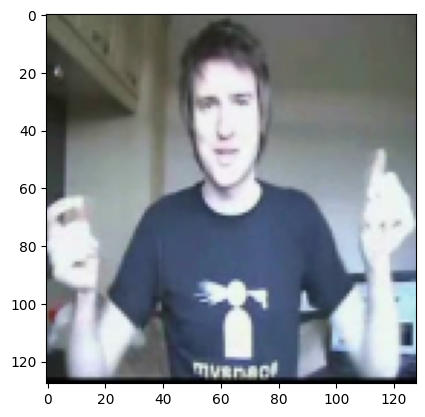

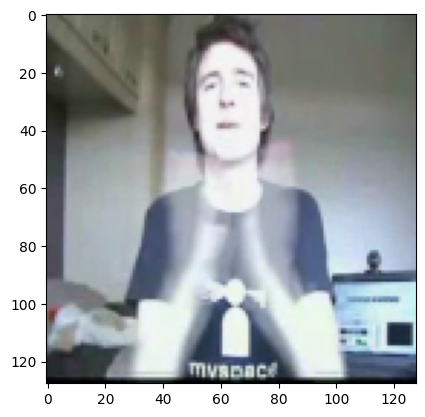

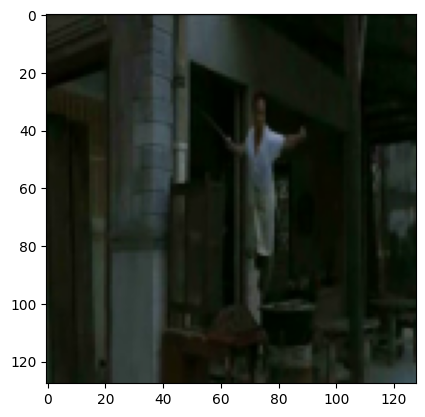

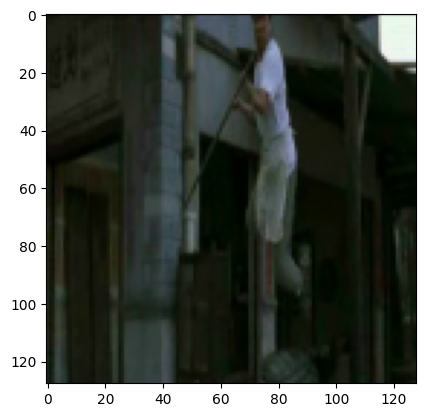

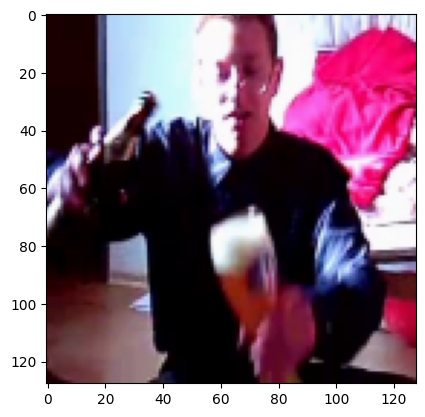

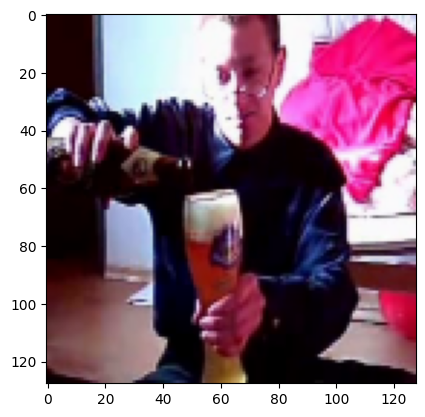

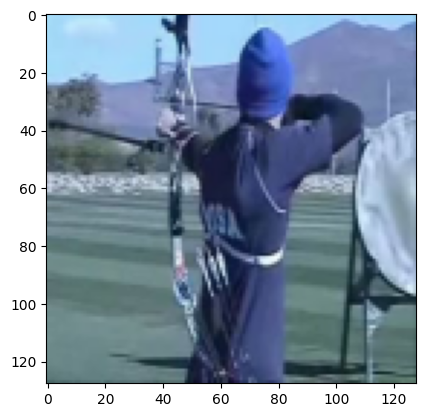

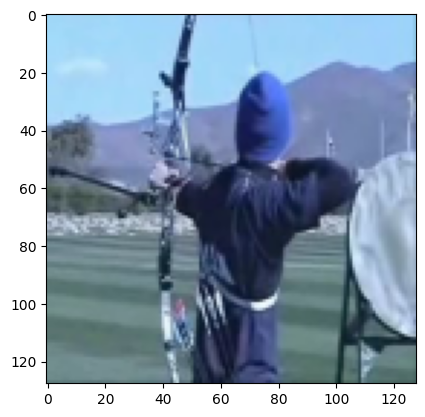

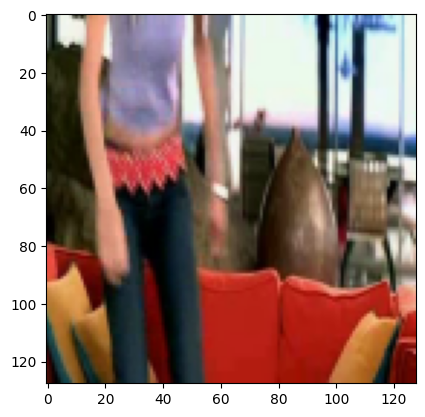

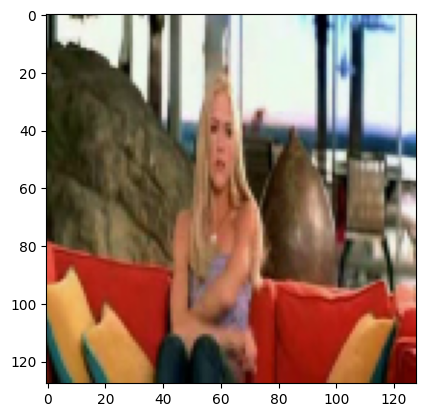

In [ ]:
ind = list(range(x.shape[0]))
random.shuffle(ind)
ind = ind[: 5]
ind.sort()
for i in ind:
    plt.imshow(x[i][0].astype(np.int32))
    plt.show()
    plt.imshow(x[i][-1].astype(np.int32))
    plt.show()

In [ ]:
x_group_ind = defaultdict(list)
for i in range(y.shape[0]):
    x_group_ind[y[i]].append(i)

query_ind = []
train_ind = []
gallery_ind = []

for group in x_group_ind.keys():
    ind = []
    random.shuffle(x_group_ind[group])
    ind += x_group_ind[group][: 10]
    query_ind += x_group_ind[group][: 10]
    random.shuffle(x_group_ind[group])
    ind += x_group_ind[group][: 20]
    gallery_ind += x_group_ind[group][: 20]
    # ind = list(set(x_group_ind[group]) - set(ind))
    random.shuffle(x_group_ind[group])
    # train_ind += ind
    train_ind += x_group_ind[group][: 10]

query_ind.sort()
train_ind.sort()
gallery_ind.sort()

print(len(query_ind))
print(len(train_ind))
print(len(gallery_ind))

210
210
420


In [ ]:
feature_extractor = keras.applications.convnext.ConvNeXtXLarge(
    weights = 'imagenet',
    include_top = False,
    pooling = 'avg',
    input_shape = (128, 128, 3),
)

preprocess_input = keras.applications.convnext.preprocess_input

inputs = keras.Input((128, 128, 3))
preprocessed = preprocess_input(inputs)

outputs = feature_extractor(preprocessed)

model = keras.Model(inputs, outputs, name = 'feature_extractor')

model.summary()

1393257616/1393257616 [==============================] - 42s 0us/step
Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 convnext_xlarge (Functional  (None, 2048)             348147968 
 )                                                               
                                                                 
Total params: 348,147,968
Trainable params: 348,147,968
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = x.reshape(-1, 128, 128, 3)
x = model.predict(x, batch_size = 32)
x = x.reshape(-1, 16, 2048)
print(x.shape)

464/464 [==============================] - 237s 476ms/step
(928, 16, 2048)


In [ ]:
x_query = x[query_ind]
y_query = y[query_ind]
x_train = x[train_ind]
y_train = y[train_ind]
x_gallery = x[gallery_ind]
y_gallery = y[gallery_ind]

print(x_query.shape, y_query.shape)
print(x_train.shape, y_train.shape)
print(x_gallery.shape, y_gallery.shape)

np.save('x_query.npy', x_query)
np.save('y_query.npy', y_query)
np.save('x_gallery.npy', x_gallery)
np.save('y_gallery.npy', y_gallery)

(210, 16, 2048) (210,)
(210, 16, 2048) (210,)
(420, 16, 2048) (420,)


In [ ]:
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)

In [ ]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [ ]:
x_group = defaultdict(list)
for i in tqdm(range(x_train.shape[0])):
    x_group[y_train[i]].append(x_train[i])

  0%|          | 0/210 [00:00<?, ?it/s]

In [ ]:
x_train = []
for group, samples in tqdm(x_group.items()):
    for i in range(len(samples)):
        anchor = samples[i]
        for j in range(i + 1, len(samples)):
            positive = samples[j]
            groups = list(x_group.keys())
            groups.remove(group)
            for k in range(3):
                negative_group = random.choice(groups)
                negative = random.choice(x_group[negative_group])
                triplet = [anchor, positive, negative]
                x_train.append(triplet)
x_train = np.array(x_train)
print(x_train.shape)

np.save('anchor.npy', x_train[:, 0])
np.save('positive.npy', x_train[:, 1])
np.save('negative.npy', x_train[:, 2])

  0%|          | 0/21 [00:00<?, ?it/s]

(2835, 3, 16, 2048)


# Checkpoint

In [ ]:
import os
import random
import skvideo.io
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

from scipy import spatial
from tqdm.notebook import tqdm
from collections import defaultdict
from skimage.transform import resize

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
x_query = np.load('x_query.npy')
y_query = np.load('y_query.npy')

x_gallery = np.load('x_gallery.npy')
y_gallery = np.load('y_gallery.npy')

print(x_query.shape, y_query.shape)
print(x_gallery.shape, y_gallery.shape)

anchor = np.load('anchor.npy')
positive = np.load('positive.npy')
negative = np.load('negative.npy')

print(anchor.shape, positive.shape, negative.shape)

(210, 16, 2048) (210,)
(420, 16, 2048) (420,)
(2835, 16, 2048) (2835, 16, 2048) (2835, 16, 2048)


In [ ]:
y = [0] * anchor.shape[0]
y = np.array(y, dtype = np.float32)

In [ ]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
        self.sequence_length = sequence_length
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_positions = self.position_embeddings(positions)
        return inputs + embedded_positions

    def compute_mask(self, inputs, mask=None):
        mask = tf.reduce_any(tf.cast(inputs, "bool"), axis=-1)
        return mask

In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.2,
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation=tf.nn.gelu), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

In [ ]:
sequence_length = 16
embed_dim = 2048
dense_dim = 16
num_heads = 2
alpha = 0.2

In [ ]:
def create_embedding_model():
    inputs = keras.Input(shape=(sequence_length, embed_dim))
    x = PositionalEmbedding(sequence_length, embed_dim, name = "frame_position_embedding")(inputs)
    x = TransformerEncoder(embed_dim, dense_dim, num_heads, name="transformer_layer")(x)
    x = layers.GlobalMaxPooling1D()(x)
    outputs = layers.Dense(dense_dim, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

def siamese_model(embedding_model):

    input_anchor = tf.keras.layers.Input(shape=(sequence_length, embed_dim))
    input_positive = tf.keras.layers.Input(shape=(sequence_length, embed_dim))
    input_negative = tf.keras.layers.Input(shape=(sequence_length, embed_dim))

    embedding_anchor = embedding_model(input_anchor)
    embedding_positive = embedding_model(input_positive)
    embedding_negative = embedding_model(input_negative)
    output = tf.keras.layers.concatenate([embedding_anchor, embedding_positive, embedding_negative], axis=1)

    siamese_net = tf.keras.models.Model([input_anchor, input_positive, input_negative], output)
    
    return siamese_net

def euclidean(a, b):
    distance = tf.square(a - b)
    distance = tf.reduce_mean(distance, axis = 1)
    return distance

def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:, :dense_dim], y_pred[:, dense_dim: 2 * dense_dim], y_pred[:, 2 * dense_dim:]
    positive_dist = euclidean(anchor, positive)
    negative_dist1 = euclidean(anchor, negative)
    negative_dist2 = euclidean(positive, negative)
    return tf.maximum(positive_dist + alpha - 0.5 * (negative_dist1 + negative_dist2), 0.0)

In [ ]:
embedding_model = create_embedding_model()
model = siamese_model(embedding_model)
model.compile(optimizer = 'adam', loss = triplet_loss)
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 16, 2048)]   0           []                               
                                                                                                  
 input_31 (InputLayer)          [(None, 16, 2048)]   0           []                               
                                                                                                  
 input_32 (InputLayer)          [(None, 16, 2048)]   0           []                               
                                                                                                  
 model_14 (Functional)          (None, 16)           33710112    ['input_30[0][0]',               
                                                                  'input_31[0][0]',        

In [ ]:
ind = list(range(anchor.shape[0]))
random.shuffle(ind)
anchor = anchor[ind]
positive = positive[ind]
negative = negative[ind]

In [ ]:
history = model.fit([anchor, positive, negative], y, epochs = 8, batch_size = 64, shuffle = True)

Epoch 1/8
45/45 [==============================] - 15s 187ms/step - loss: 0.0392
Epoch 2/8
45/45 [==============================] - 8s 189ms/step - loss: 0.0131
Epoch 3/8
45/45 [==============================] - 8s 185ms/step - loss: 0.0088
Epoch 4/8
45/45 [==============================] - 8s 179ms/step - loss: 0.0071
Epoch 5/8
45/45 [==============================] - 8s 179ms/step - loss: 0.0065
Epoch 6/8
45/45 [==============================] - 8s 177ms/step - loss: 0.0052
Epoch 7/8
45/45 [==============================] - 8s 175ms/step - loss: 0.0042
Epoch 8/8
45/45 [==============================] - 8s 176ms/step - loss: 0.0038


In [ ]:
embedding_model.save('embedding_model.h5')

In [ ]:
embedding_model = tf.keras.models.load_model('embedding_model.h5', custom_objects={'PositionalEmbedding': PositionalEmbedding, 'TransformerEncoder': TransformerEncoder})

In [ ]:
for i in range(100):
    a = embedding_model.predict(anchor[i: i + 1], verbose = 0)
    p = embedding_model.predict(positive[i: i + 1], verbose = 0)
    n = embedding_model.predict(negative[i: i + 1], verbose = 0)
    print('ap: %.2f \t an: %.2f \t pn: %.2f' % (euclidean(a, p), euclidean(a, n), euclidean(p, n)))

ap: 0.04 	 an: 0.41 	 pn: 0.34
ap: 0.11 	 an: 0.58 	 pn: 0.49
ap: 0.04 	 an: 0.48 	 pn: 0.53
ap: 0.09 	 an: 0.44 	 pn: 0.55
ap: 0.00 	 an: 0.58 	 pn: 0.58
ap: 0.00 	 an: 0.31 	 pn: 0.31
ap: 0.02 	 an: 0.50 	 pn: 0.46
ap: 0.00 	 an: 0.42 	 pn: 0.42
ap: 0.00 	 an: 0.27 	 pn: 0.27
ap: 0.12 	 an: 0.50 	 pn: 0.62
ap: 0.00 	 an: 0.50 	 pn: 0.50
ap: 0.04 	 an: 0.25 	 pn: 0.19
ap: 0.00 	 an: 0.37 	 pn: 0.37
ap: 0.10 	 an: 0.25 	 pn: 0.35
ap: 0.06 	 an: 0.58 	 pn: 0.54
ap: 0.08 	 an: 0.42 	 pn: 0.34
ap: 0.00 	 an: 0.36 	 pn: 0.36
ap: 0.00 	 an: 0.68 	 pn: 0.68
ap: 0.01 	 an: 0.43 	 pn: 0.45
ap: 0.05 	 an: 0.60 	 pn: 0.56
ap: 0.00 	 an: 0.39 	 pn: 0.36
ap: 0.00 	 an: 0.51 	 pn: 0.51
ap: 0.02 	 an: 0.64 	 pn: 0.61
ap: 0.00 	 an: 0.39 	 pn: 0.39
ap: 0.04 	 an: 0.55 	 pn: 0.61
ap: 0.06 	 an: 0.42 	 pn: 0.36
ap: 0.03 	 an: 0.69 	 pn: 0.63
ap: 0.00 	 an: 0.63 	 pn: 0.61
ap: 0.04 	 an: 0.52 	 pn: 0.45
ap: 0.01 	 an: 0.40 	 pn: 0.37
ap: 0.00 	 an: 0.62 	 pn: 0.62
ap: 0.01 	 an: 0.48 	 pn: 0.50
ap: 0.06

In [ ]:
x_query_emb = embedding_model.predict(x_query)
x_gallery_emb = embedding_model.predict(x_gallery)

14/14 [==============================] - 0s 19ms/step


In [ ]:
x_query_emb_rounded = tf.math.round(x_query_emb)
x_gallery_emb_rounded = tf.math.round(x_gallery_emb)

In [ ]:
def precision_k(rankings, k=20):
    prec_vals = []
    for ranking in rankings:
        rel_count = 0
        for [dist, rel] in ranking[:k]:
            rel_count += rel
        prec_vals.append(rel_count/k)
    return sum(prec_vals)/len(prec_vals)

def map(rankings):
    ap_vals = []
    for ranking in rankings:
        p_vals = []
        rel_count = 0
        total_count = 0
        for [dist, rel] in ranking:
            rel_count += rel
            total_count += 1
            if rel:
                p = rel_count/total_count
                p_vals.append(p)
        ap = sum(p_vals)/len(p_vals) if p_vals else 0
        ap_vals.append(ap)
    return sum(ap_vals)/len(ap_vals)

In [ ]:
# dim = 16, ConvNext with new split technique with binary activation
total1 = 0
total2 = 0
rankings1 = []
rankings2 = []

for i in tqdm(range(x_query_emb.shape[0])):
    ranking = []
    for j in range(x_gallery_emb.shape[0]):
        dist = euclidean(x_query_emb_rounded[i: i + 1], x_gallery_emb_rounded[j: j + 1])
        if y_query[i] == y_gallery[j]:
            ranking.append([dist, 1])
        else:
            ranking.append([dist, 0])
    ranking.sort()
    rankings1.append(ranking)
    counter = 0    counter = 0

    for j in range(20):
        if ranking[j][-1]:
            counter += 1
    total1 += counter
    print('Ranking for %3d: %2d (%4d)' % (i + 1, counter, total1), end='\t')

    ranking = []
    for j in range(x_gallery_emb.shape[0]):
        dist = euclidean(x_query_emb[i: i + 1], x_gallery_emb[j: j + 1])
        if y_query[i] == y_gallery[j]:
            ranking.append([dist, 1])
        else:
            ranking.append([dist, 0])
    ranking.sort()
    rankings2.append(ranking)
    counter = 0
    for j in range(20):
        if ranking[j][-1]:
            counter += 1
    total2 += counter
    print('%3d: %2d (%4d)' % (i + 1, counter, total2))

k=20
print('Total: %d' % total1)
print('Precision @ %d: %.3f' % (k, precision_k(rankings1, k=20)))
print('mAP: %.3f' % (map(rankings1)))

print('Total: %d' % total2)
print('Precision @ %d: %.3f' % (k, precision_k(rankings2, k=20)))
print('mAP: %.3f' % (map(rankings2)))

  0%|          | 0/210 [00:00<?, ?it/s]

Ranking for   1: 12 (  12)	  1: 15 (  15)
Ranking for   2: 10 (  22)	  2: 16 (  31)
Ranking for   3: 12 (  34)	  3: 15 (  46)
Ranking for   4: 12 (  46)	  4: 15 (  61)
Ranking for   5:  3 (  49)	  5:  3 (  64)
Ranking for   6: 12 (  61)	  6: 15 (  79)
Ranking for   7:  1 (  62)	  7:  1 (  80)
Ranking for   8:  1 (  63)	  8:  1 (  81)
Ranking for   9: 12 (  75)	  9: 15 (  96)
Ranking for  10:  1 (  76)	 10:  1 (  97)
Ranking for  11:  2 (  78)	 11:  2 (  99)
Ranking for  12:  2 (  80)	 12:  2 ( 101)
Ranking for  13: 13 (  93)	 13: 16 ( 117)
Ranking for  14: 14 ( 107)	 14: 16 ( 133)
Ranking for  15: 14 ( 121)	 15: 15 ( 148)
Ranking for  16: 14 ( 135)	 16: 16 ( 164)
Ranking for  17: 14 ( 149)	 17: 16 ( 180)
Ranking for  18: 12 ( 161)	 18: 14 ( 194)
Ranking for  19:  8 ( 169)	 19: 14 ( 208)
Ranking for  20: 12 ( 181)	 20: 14 ( 222)
Ranking for  21:  3 ( 184)	 21:  6 ( 228)
Ranking for  22:  5 ( 189)	 22:  6 ( 234)
Ranking for  23:  9 ( 198)	 23: 10 ( 244)
Ranking for  24:  4 ( 202)	 24:  9

In [ ]:
# dim = 32, ConvNext with new split technique with binary activation
total1 = 0
total2 = 0
rankings1 = []
rankings2 = []

for i in tqdm(range(x_query_emb.shape[0])):
    ranking = []
    for j in range(x_gallery_emb.shape[0]):
        dist = euclidean(x_query_emb_rounded[i: i + 1], x_gallery_emb_rounded[j: j + 1])
        if y_query[i] == y_gallery[j]:
            ranking.append([dist, 1])
        else:
            ranking.append([dist, 0])
    ranking.sort()
    rankings1.append(ranking)
    counter = 0
    for j in range(20):
        if ranking[j][-1]:
            counter += 1
    total1 += counter
    print('Ranking for %3d: %2d (%4d)' % (i + 1, counter, total1), end='\t')

    ranking = []
    for j in range(x_gallery_emb.shape[0]):
        dist = euclidean(x_query_emb[i: i + 1], x_gallery_emb[j: j + 1])
        if y_query[i] == y_gallery[j]:
            ranking.append([dist, 1])
        else:
            ranking.append([dist, 0])
    ranking.sort()
    rankings2.append(ranking)
    counter = 0
    for j in range(20):
        if ranking[j][-1]:
            counter += 1
    total2 += counter
    print('%3d: %2d (%4d)' % (i + 1, counter, total2))

k=20
print('Total: %d' % total1)
print('Precision @ %d: %.3f' % (k, precision_k(rankings1, k=20)))
print('mAP: %.3f' % (map(rankings1)))

print('Total: %d' % total2)
print('Precision @ %d: %.3f' % (k, precision_k(rankings2, k=20)))
print('mAP: %.3f' % (map(rankings2)))

  0%|          | 0/210 [00:00<?, ?it/s]

Ranking for   1: 16 (  16)	  1: 15 (  15)
Ranking for   2: 17 (  33)	  2: 17 (  32)
Ranking for   3: 17 (  50)	  3: 17 (  49)
Ranking for   4:  1 (  51)	  4:  1 (  50)
Ranking for   5: 17 (  68)	  5: 17 (  67)
Ranking for   6: 17 (  85)	  6: 17 (  84)
Ranking for   7:  1 (  86)	  7:  1 (  85)
Ranking for   8: 14 ( 100)	  8: 17 ( 102)
Ranking for   9: 17 ( 117)	  9: 17 ( 119)
Ranking for  10: 16 ( 133)	 10: 16 ( 135)
Ranking for  11:  1 ( 134)	 11:  1 ( 136)
Ranking for  12: 10 ( 144)	 12: 13 ( 149)
Ranking for  13: 16 ( 160)	 13: 16 ( 165)
Ranking for  14: 16 ( 176)	 14: 16 ( 181)
Ranking for  15: 16 ( 192)	 15: 16 ( 197)
Ranking for  16: 16 ( 208)	 16: 16 ( 213)
Ranking for  17: 16 ( 224)	 17: 16 ( 229)
Ranking for  18: 16 ( 240)	 18: 16 ( 245)
Ranking for  19: 16 ( 256)	 19: 16 ( 261)
Ranking for  20: 16 ( 272)	 20: 16 ( 277)
Ranking for  21:  5 ( 277)	 21:  7 ( 284)
Ranking for  22: 11 ( 288)	 22: 12 ( 296)
Ranking for  23: 15 ( 303)	 23: 15 ( 311)
Ranking for  24: 13 ( 316)	 24: 13

In [ ]:
# dim = 64, ConvNext with new split technique with binary activation
total1 = 0
total2 = 0
rankings1 = []
rankings2 = []

for i in tqdm(range(x_query_emb.shape[0])):
    ranking = []
    for j in range(x_gallery_emb.shape[0]):
        dist = euclidean(x_query_emb_rounded[i: i + 1], x_gallery_emb_rounded[j: j + 1])
        if y_query[i] == y_gallery[j]:
            ranking.append([dist, 1])
        else:
            ranking.append([dist, 0])
    ranking.sort()
    rankings1.append(ranking)
    counter = 0
    for j in range(20):
        if ranking[j][-1]:
            counter += 1
    total1 += counter
    print('Ranking for %3d: %2d (%4d)' % (i + 1, counter, total1), end='\t')

    ranking = []
    for j in range(x_gallery_emb.shape[0]):
        dist = euclidean(x_query_emb[i: i + 1], x_gallery_emb[j: j + 1])
        if y_query[i] == y_gallery[j]:
            ranking.append([dist, 1])
        else:
            ranking.append([dist, 0])
    ranking.sort()
    rankings2.append(ranking)
    counter = 0
    for j in range(20):
        if ranking[j][-1]:
            counter += 1
    total2 += counter
    print('%3d: %2d (%4d)' % (i + 1, counter, total2))

k=20
print('Total: %d' % total1)
print('Precision @ %d: %.3f' % (k, precision_k(rankings1, k=20)))
print('mAP: %.3f' % (map(rankings1)))

print('Total: %d' % total2)
print('Precision @ %d: %.3f' % (k, precision_k(rankings2, k=20)))
print('mAP: %.3f' % (map(rankings2)))

  0%|          | 0/210 [00:00<?, ?it/s]

Ranking for   1: 17 (  17)	  1: 17 (  17)
Ranking for   2: 17 (  34)	  2: 17 (  34)
Ranking for   3: 17 (  51)	  3: 17 (  51)
Ranking for   4:  1 (  52)	  4:  1 (  52)
Ranking for   5: 17 (  69)	  5: 17 (  69)
Ranking for   6: 17 (  86)	  6: 17 (  86)
Ranking for   7:  0 (  86)	  7:  1 (  87)
Ranking for   8: 17 ( 103)	  8: 17 ( 104)
Ranking for   9: 17 ( 120)	  9: 17 ( 121)
Ranking for  10: 16 ( 136)	 10: 17 ( 138)
Ranking for  11:  1 ( 137)	 11:  1 ( 139)
Ranking for  12: 17 ( 154)	 12: 17 ( 156)
Ranking for  13: 16 ( 170)	 13: 17 ( 173)
Ranking for  14: 16 ( 186)	 14: 17 ( 190)
Ranking for  15: 17 ( 203)	 15: 17 ( 207)
Ranking for  16: 17 ( 220)	 16: 17 ( 224)
Ranking for  17: 16 ( 236)	 17: 17 ( 241)
Ranking for  18: 16 ( 252)	 18: 16 ( 257)
Ranking for  19: 17 ( 269)	 19: 17 ( 274)
Ranking for  20: 16 ( 285)	 20: 17 ( 291)
Ranking for  21: 13 ( 298)	 21: 14 ( 305)
Ranking for  22:  7 ( 305)	 22:  6 ( 311)
Ranking for  23: 11 ( 316)	 23: 11 ( 322)
Ranking for  24: 13 ( 329)	 24: 13